In [738]:
#Importing all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns
%matplotlib inline


In [739]:
#importing dataset
data1 = pd.read_csv("/Users/elinaneu/Desktop/Mappe1.csv")

In [740]:
data1.location.value_counts()

Mexico                             551
Argentina                          551
Thailand                           548
Peru                               546
Taiwan                             536
                                  ... 
British Virgin Islands              36
Cook Islands                        36
Pitcairn                             7
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: location, Length: 230, dtype: int64

In [741]:
#data cleaning
for ctr in data1["location"].unique():
    i = int(data1.loc[data1["location"] == ctr].iloc[0:1].index[0])
    data1.iloc[i:i+1] = data1.iloc[i:i+1].fillna(0)
data1 = data1.fillna(method='ffill')
data1.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0


In [742]:
data1['date'] = pd.to_datetime(data1['date'])

In [768]:
data1["people_fully_vaccinated"] = data1["people_fully_vaccinated"]*1000


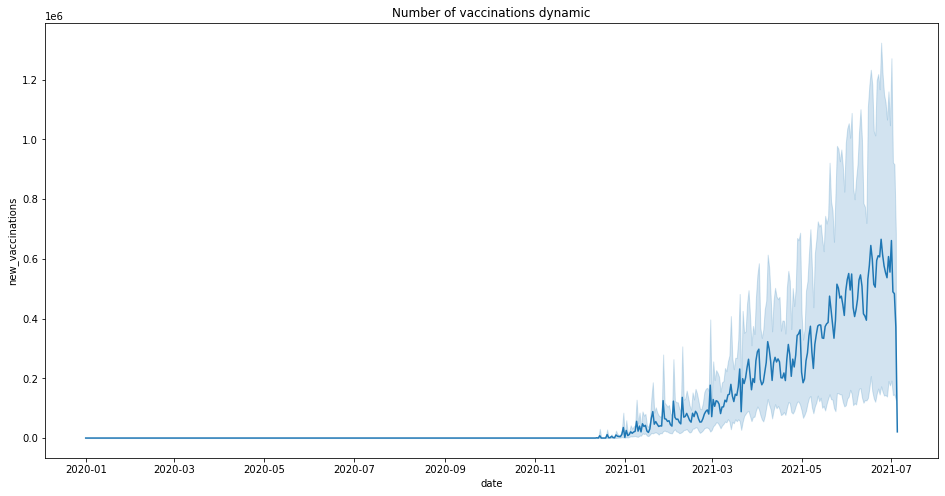

<AxesSubplot:title={'center':'Number of vaccinations dynamic'}, xlabel='date', ylabel='new_vaccinations'>

In [744]:
#Graph 1: Number of vaccinations
plt.figure(figsize=(16,8))
s = sns.lineplot(x=data1.date, y=data1.new_vaccinations)
plt.title('Number of vaccinations dynamic')
plt.show()
s

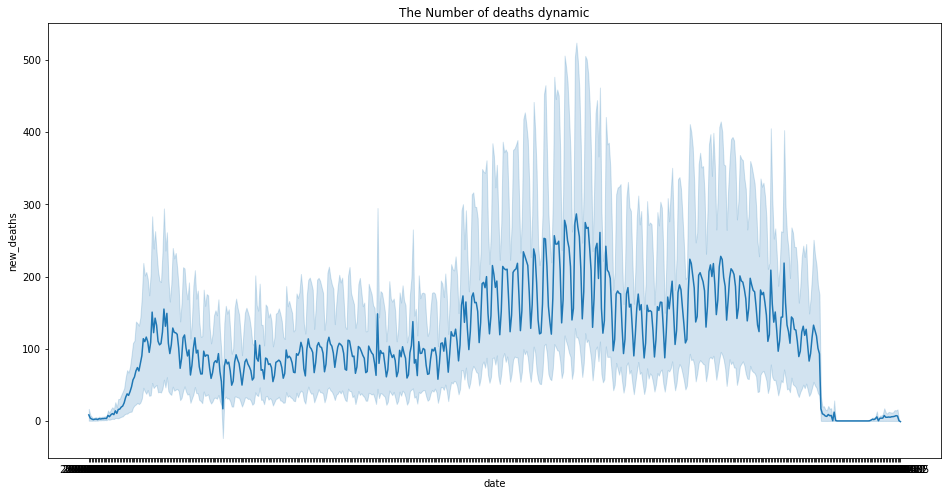

In [331]:
#Graph 2: Number of deaths worldwide
plt.figure(figsize=(16,8))
sns.lineplot(x=data1.date, y=data1.new_deaths)
plt.title('The Number of deaths dynamic')
plt.show()

In [745]:
# Graph 3: TOP 5
countries = data1.groupby('location')['new_vaccinations'].max().sort_values(ascending= False)[:5].index
top_countries = pd.DataFrame(columns= data1.columns)
for country in countries:
    top_countries = top_countries.append(data1.loc[data1['location'] == country])

/Users/elinaneu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


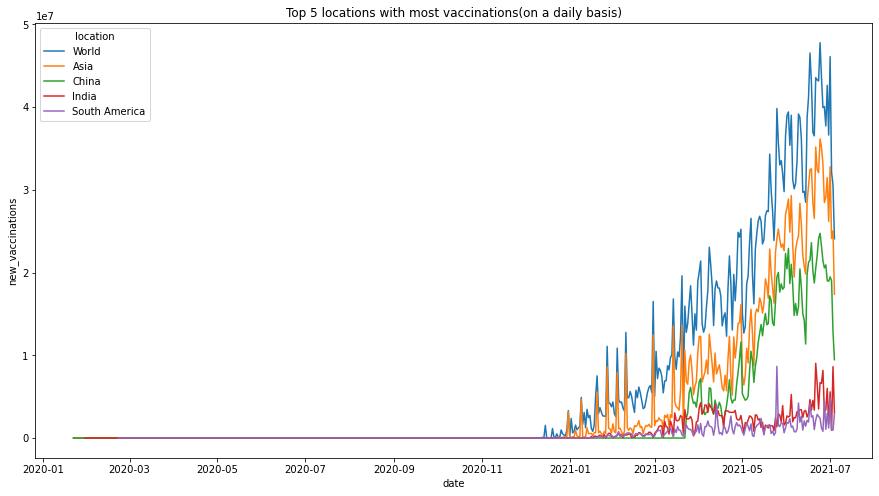

In [746]:
plt.figure(figsize=(15,8))
sns.lineplot(top_countries['date'], 
             top_countries['new_vaccinations'], 
             hue= top_countries['location'], ci= False)
plt.title('Top 5 locations with most vaccinations(on a daily basis)');

/Users/elinaneu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


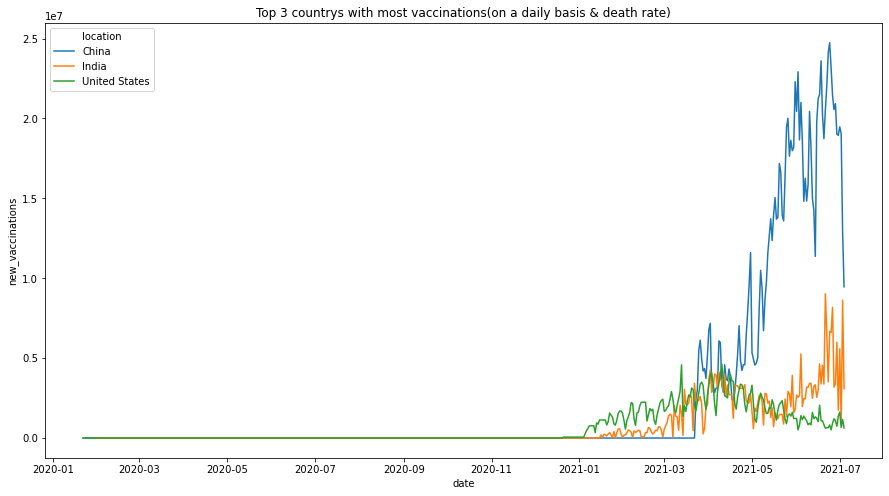

In [747]:

out_continents = data1[(data1['location'] != "World") & (data1['location'] != 'Asia')& (data1['location'] != 'Africa')&(data1['location'] != 'European Union')&(data1['location'] != 'South America')&(data1['location'] != 'North America')&(data1['location'] != 'Europe')]
out_country = out_continents.groupby('location')['new_vaccinations'].max().sort_values(ascending= False)[:3].index
top_countries_n = pd.DataFrame(columns= out_continents.columns)
for country in out_country:
    top_countries_n = top_countries_n.append(out_continents.loc[data1['location'] == country])


plt.figure(figsize=(15,8))
sns.lineplot(top_countries_n['date'], 
            top_countries_n['new_vaccinations'], 
            hue= top_countries_n['location'], ci= False)
plt.title('Top 3 countrys with most vaccinations(on a daily basis & death rate)');



/Users/elinaneu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


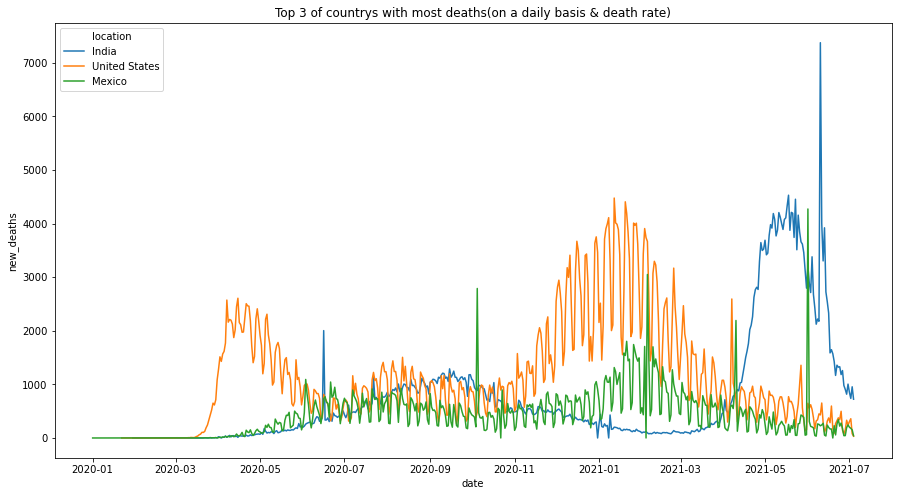

In [753]:

out_continents = data1[(data1['location'] != "World") & (data1['location'] != 'Asia')& (data1['location'] != 'Africa')&(data1['location'] != 'European Union')&(data1['location'] != 'South America')&(data1['location'] != 'North America')&(data1['location'] != 'Europe')]
out_country = out_continents.groupby('location')['new_deaths'].max().sort_values(ascending= False)[:3].index
top_countries_n = pd.DataFrame(columns= out_continents.columns)
for country in out_country:
    top_countries_n = top_countries_n.append(out_continents.loc[data1['location'] == country])


plt.figure(figsize=(15,8))
sns.lineplot(top_countries_n['date'], 
            top_countries_n['new_deaths'], 
            hue= top_countries_n['location'], ci= False)
plt.title('Top 3 of countrys with most deaths(on a daily basis & death rate)');



/Users/elinaneu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/elinaneu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


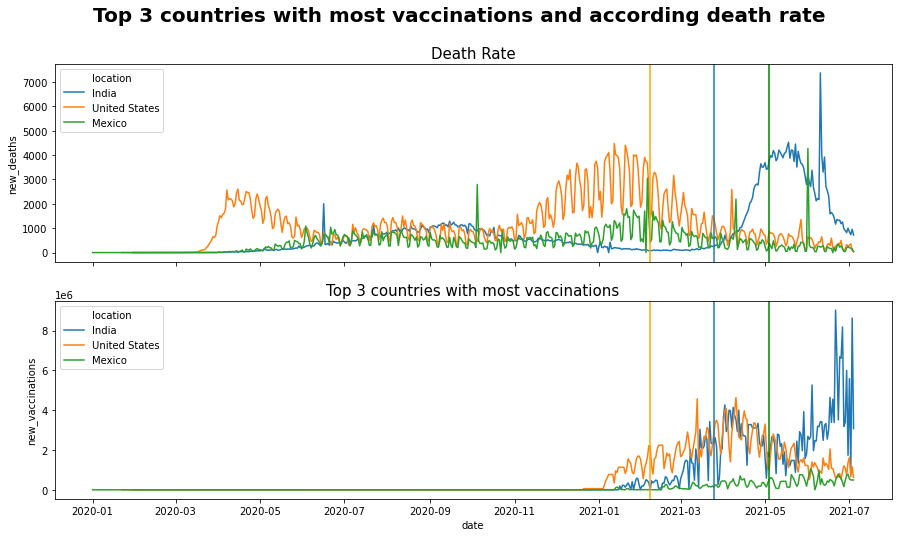

In [769]:
fig, ax = plt.subplots(2,1,figsize = (15,8),sharex=True)
fig.suptitle("Top 3 countries with most vaccinations and according death rate", size='20', fontweight='bold')
ax[0].set_title('Death Rate', size='15')
#hue- by year
sns.lineplot(top_countries_n['date'], 
            top_countries_n['new_deaths'], 
            hue= top_countries_n['location'], ax=ax[0])

def start_date(df,thr,country):
    df2 = df.copy()
    return df2[(df2["people_fully_vaccinated"] >= thr) &  (df2['location'] == country)].loc[:,['location','date','people_fully_vaccinated']].iloc[0,1]
i = start_date(data1, z, "India")
u = start_date(data1, z, "United States")
m = start_date(data1, z, "Mexico")
ax[0].axvline(x= i)
ax[0].axvline(x= u, color = "orange")
ax[0].axvline(x= m, color = "green")
ax[1].set_title('Top 3 countries with most vaccinations', size='15')
#hue- by year
sns.lineplot(top_countries_n['date'], 
            top_countries_n['new_vaccinations'], 
            hue= top_countries_n['location'], ax=ax[1])

ax[1].axvline(x=i)
ax[1].axvline(x= u, color = "orange")
ax[1].axvline(x= m, color = "green")

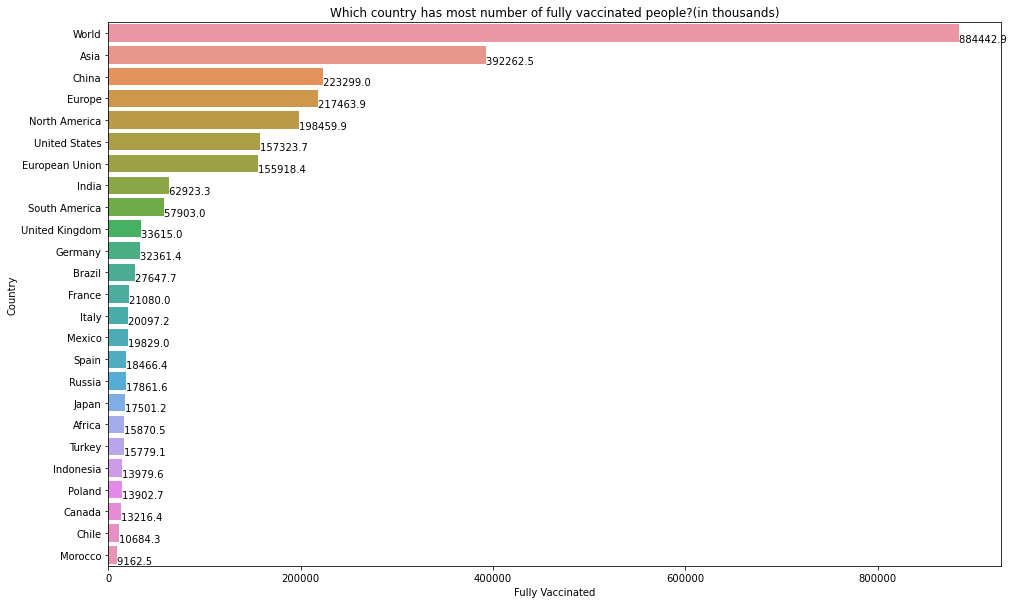

In [754]:
#Graph 4: Most vaccinated people
fully_vaccinated = data1.groupby("location")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)
fully_vaccinated.reset_index()
'Graph 2: Fully Vaccinated People'
plt.figure(figsize=(16,10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)
plt.xlabel("Fully Vaccinated")
plt.ylabel("Country");
plt.title('Which country has most number of fully vaccinated people?(in thousands)');

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

In [755]:
data1.groupby("location")["people_fully_vaccinated"].max

<bound method GroupBy.max of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fedcf793550>>

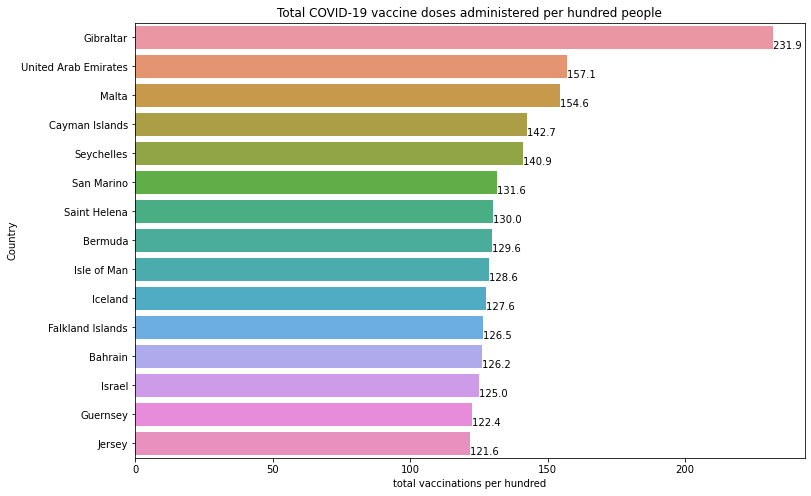

In [756]:
# Graph 5: Most vaccinated people per hundred
daily_vaccinations_per_million = data1.groupby("location")["total_vaccinations_per_hundred"].max().sort_values(ascending= False).head(15)
daily_vaccinations_per_million.reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(x=daily_vaccinations_per_million, y=daily_vaccinations_per_million.index )
plt.xlabel("total vaccinations per hundred")
plt.ylabel("Country")
plt.title("Total COVID-19 vaccine doses administered per hundred people");

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

In [757]:
#population dataset
population = pd.read_csv("/Users/elinaneu/Downloads/population_by_country_2020.csv")

In [758]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [770]:
x = str(input("Choose a country: "))
for i in population['Country (or dependency)']:
    if i == x:
        y = population.loc[population['Country (or dependency)'] == i,'Population (2020)']*0.1
    
z= float(y)
z
#type(z)
def start_date(df,thr,country):
    '''
    This function return the date at which the number of vaccinations is above a given threshold for a given country
    Inputs:
    df = dataframe with information
    thr = threshold for vacination (float)
    country = country to consider (string)
    Outputs:
    Timestamp
    '''
    df2 = df.copy()
    return df2[(df2["people_fully_vaccinated"] >= thr) &  (df2['location'] == country)].loc[:,['location','date','people_fully_vaccinated']].iloc[0,1]
t = start_date(data1, z, x)
t

Choose a country: Germany


Timestamp('2021-05-11 00:00:00')

In [641]:
#data1[(data1["people_fully_vaccinated"] >= z) &  (data1['location'] == x)].loc[:,['location','date','people_fully_vaccinated']]

In [772]:
after_20 = data1[(data1['location'] == x) & (data1['date'] > t)]['new_deaths'].mean()
after_20

before_20 = data1[(data1['location'] == x) & (data1['date'] <= t)]['new_deaths'].mean()
before_20

len_after = len(data1[(data1['location'] == x) & (data1['date'] > t)]['new_deaths'])
print(len_after)

len_before = len(data1[(data1['location'] == x) & (data1['date'] <= t)]['new_deaths'])
print(len_before)

54
474


292.60689655172416

180.13713080168776

In [534]:
#data1[(data1["people_fully_vaccinated"] >= z) &  (data1['location'] == x)].loc[:,['location','date','people_fully_vaccinated']].iloc[0,1]

In [763]:
before20 = data1[(data1['location'] == x) & (data1['date'] <= t)]['new_deaths']
after20 = data1[(data1['location'] == x) & (data1['date'] > t)]['new_deaths']

In [764]:
x = before20.to_numpy(dtype ='float32')
y = after20.to_numpy(dtype = "float32")

std_before = np.std(x, ddof=1)# use np.std() ddof = ?
std_after = np.std(y, ddof=1)# use np.std() ddof = ?

In [765]:
s2 = (((len_before-1)*(std_before**2))+((len_after-1)*(std_after**2)))/(len_before+len_after-2)
s2

64893.78619548479

In [766]:
t_value = (before_20-after_20)/(((s2*((1/len_before)+(1/len_after)))**0.5))
t_value

2.0617280128335014

In [767]:
stats.t.sf(np.abs(t_wert), ((len_before+len_after)-1))

0.019861711106603643

In [735]:
std_before

267.11853

In [694]:
std_after

9.835083

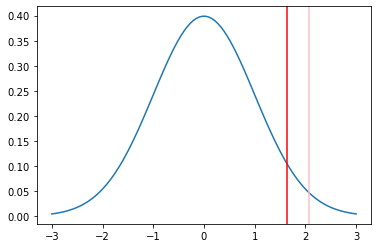

In [736]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(x=zc, color="red")
plt.axvline(x=t_wert, color="pink")
plt.show()

In [ ]:
data1[(people_fully)]

In [655]:
zc = stats.norm.ppf(1-(0.05))# stats.norm.ppf()

print("The tc critical value is: {:.2f}".format(zc))

The tc critical value is: 1.64


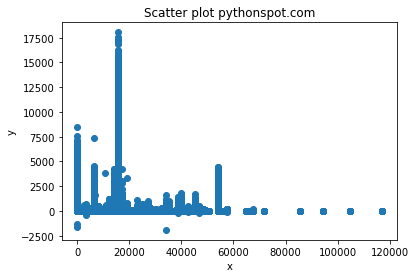

In [668]:
# Create data
x = np.array(data1["gdp_per_capita"])
y = np.array(data1["new_deaths"])

colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [663]:
x = np.array(data1["gdp_per_capita"])

array([1803.987, 1803.987, 1803.987, ..., 1899.775, 1899.775, 1899.775])